# Fashion MNIST classifier FGSM Experiement
Date: 9/18/2025  
Author: Keigo Morita   
Description: Perform FGSM attack on Keras Classifier from tensorflow classifcation tutorial using ART 

## 1. Objective / Hypothesis / Success Criteria
- Objective: Perform FGSM on classsification model using ART
- Hypothesis: The accurecy of the model drop on adversarial example generated using FGSM
- Success Criteria: Quantify and visualize the accurecy drop on various epsion values

## 2. Environment
- Python: Python 3.11.13
- OS: Ubuntu 22.04.3 LTS
- Tools:
  - Tensorflow: 2.20.0
  - Keras: 3.11.2
  - Adversarial Robustness Toolbox: 1.20.1


In [6]:
!cat /etc/os-release
!python --version
!pip show tensorflow
!pip show keras
!pip show adversarial-robustness-toolbox

PRETTY_NAME="Ubuntu 22.04.3 LTS"
NAME="Ubuntu"
VERSION_ID="22.04"
VERSION="22.04.3 LTS (Jammy Jellyfish)"
VERSION_CODENAME=jammy
ID=ubuntu
ID_LIKE=debian
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
UBUNTU_CODENAME=jammy


Python 3.11.13
Name: tensorflow
Version: 2.20.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google_pasta, grpcio, h5py, keras, libclang, ml_dtypes, numpy, opt_einsum, packaging, protobuf, requests, setuptools, six, tensorboard, termcolor, typing_extensions, wrapt
Required-by: 
Name: keras
Version: 3.11.2
Summary: Multi-backend Keras
Home-page: 
Author: 
Author-email: Keras team <keras-users@googlegroups.com>
License: Apache License 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, packaging, rich
Required-by: tensorflow
Name: adversarial-robustness-toolbox
Version: 1.20.1
Summary: Toolbox for adversarial machine learning.
Home-page: https://github.com/Trusted-AI/adversarial-rob

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from art.attacks.evasion import FastGradientMethod
from art.estimators.classification import KerasClassifier

2025-09-23 05:34:34.513143: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-23 05:34:34.609720: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.11/dist-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/g

## 3. Dataset
#### Dataset: Fashion MNIST

Load Dataset

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Preprocessing

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## 4. Model

### 4.1 Model Layer Setup

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1758605687.019201   96310 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6913 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6


In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### 4.2 Model Training

In [8]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


2025-09-23 05:35:01.199091: I external/local_xla/xla/service/service.cc:163] XLA service 0x7ba930003cf0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-09-23 05:35:01.199116: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2025-09-23 05:35:01.223705: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-09-23 05:35:01.294447: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91300
2025-09-23 05:35:01.318728: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-23 05:35:01.318828: I e

  53/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5226 - loss: 1.4408

I0000 00:00:1758605702.810271   96721 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8264 - loss: 0.4930
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8264 - loss: 0.4930
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8632 - loss: 0.3747
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8632 - loss: 0.3747
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8789 - loss: 0.3348
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8789 - loss: 0.3348
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8861 - loss: 0.3121
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8861 - loss: 0.3121
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8911 - loss: 0.2930
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8911 - loss: 0.2930
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8964 - loss: 0.2816
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━

In [9]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - 6ms/step - accuracy: 0.8805 - loss: 0.3419

Test accuracy: 0.8805000185966492

Test accuracy: 0.8805000185966492


## 5. Attack / Defense Config

In [10]:
epsions = [0.01,0.05,0.1,0.2]
classifier = KerasClassifier(model=model)
attacks = [FastGradientMethod(estimator=classifier,eps=eps) for eps in epsions]

## 6. Result

In [11]:
test_adv_images_list = [attack.generate(test_images) for attack in attacks]

for i,test_adv_images in enumerate(test_adv_images_list):
  test_loss, test_acc = model.evaluate(test_adv_images,  test_labels, verbose=2)
  print(f'Test accuracy (epsilon: {epsions[i]}): {test_acc:.4f}\n')

313/313 - 1s - 2ms/step - accuracy: 0.8070 - loss: 0.4560
Test accuracy (epsilon: 0.01): 0.8070

Test accuracy (epsilon: 0.01): 0.8070

313/313 - 1s - 2ms/step - accuracy: 0.2955 - loss: 4.1165
313/313 - 1s - 2ms/step - accuracy: 0.2955 - loss: 4.1165
Test accuracy (epsilon: 0.05): 0.2955

Test accuracy (epsilon: 0.05): 0.2955

313/313 - 1s - 3ms/step - accuracy: 0.1532 - loss: 10.4020
313/313 - 1s - 3ms/step - accuracy: 0.1532 - loss: 10.4020
Test accuracy (epsilon: 0.1): 0.1532

Test accuracy (epsilon: 0.1): 0.1532

313/313 - 1s - 3ms/step - accuracy: 0.0875 - loss: 23.4378
Test accuracy (epsilon: 0.2): 0.0875

313/313 - 1s - 3ms/step - accuracy: 0.0875 - loss: 23.4378
Test accuracy (epsilon: 0.2): 0.0875



## 7. Visualization

In [12]:
def visualize_adversarial_attack(image_idx, epsilon_idx, clean_images, adversarial_images_list, 
                                labels, model, class_names, epsions, figsize=(20, 5)):
    """
    Visualize clean image, adversarial image, perturbation, and their predictions.
    
    Parameters:
    - image_idx: Index of the image to visualize
    - epsilon_idx: Index of epsilon value to use from epsions list
    - clean_images: Clean test images
    - adversarial_images_list: List of adversarial images for different epsilon values
    - labels: True labels
    - model: Trained model for predictions
    - class_names: List of class names
    - epsions: List of epsilon values
    - figsize: Figure size for the plot
    """
    
    # Get the specific images
    clean_img = clean_images[image_idx]
    adv_img = adversarial_images_list[epsilon_idx][image_idx]
    true_label = labels[image_idx]
    epsilon = epsions[epsilon_idx]
    
    # Calculate perturbation
    perturbation = adv_img - clean_img
    
    # Make predictions
    # Note: Need to add batch dimension and handle model output format
    clean_pred = model.predict(np.expand_dims(clean_img, 0), verbose=0)
    adv_pred = model.predict(np.expand_dims(adv_img, 0), verbose=0)
    
    # Convert logits to probabilities if needed
    if hasattr(tf.keras.layers, 'Softmax'):
        clean_probs = tf.nn.softmax(clean_pred).numpy()
        adv_probs = tf.nn.softmax(adv_pred).numpy()
    else:
        clean_probs = clean_pred
        adv_probs = adv_pred
    
    # Get predicted classes
    clean_pred_class = np.argmax(clean_probs[0])
    adv_pred_class = np.argmax(adv_probs[0])
    
    # Create the visualization
    fig, axes = plt.subplots(2, 3, figsize=figsize)
    
    # Row 1: Images
    # Clean image
    axes[0, 0].imshow(clean_img, cmap='gray')
    axes[0, 0].set_title(f'Clean Image\nTrue: {class_names[true_label]}', fontsize=12)
    axes[0, 0].axis('off')
    
    # Adversarial image
    axes[0, 1].imshow(adv_img, cmap='gray')
    axes[0, 1].set_title(f'Adversarial Image\nε = {epsilon}', fontsize=12)
    axes[0, 1].axis('off')
    
    # Perturbation
    # Normalize perturbation for better visualization
    pert_normalized = (perturbation - perturbation.min()) / (perturbation.max() - perturbation.min())
    axes[0, 2].imshow(pert_normalized, cmap='seismic')
    axes[0, 2].set_title(f'Perturbation\n(Normalized)', fontsize=12)
    axes[0, 2].axis('off')
    
    # Row 2: Prediction probabilities
    # Clean image predictions
    bars1 = axes[1, 0].bar(range(10), clean_probs[0], color='lightblue', alpha=0.7)
    bars1[true_label].set_color('blue')  # Highlight true class
    bars1[clean_pred_class].set_color('green')  # Highlight predicted class
    axes[1, 0].set_title(f'Clean Predictions\nPred: {class_names[clean_pred_class]} ({clean_probs[0][clean_pred_class]:.2f})', fontsize=10)
    axes[1, 0].set_xticks(range(10))
    axes[1, 0].set_xticklabels([name[:8] for name in class_names], rotation=45, ha='right', fontsize=8)
    axes[1, 0].set_ylim([0, 1])
    axes[1, 0].grid(axis='y', alpha=0.3)
    
    # Adversarial image predictions
    color = 'red' if adv_pred_class != true_label else 'green'
    bars2 = axes[1, 1].bar(range(10), adv_probs[0], color='lightcoral', alpha=0.7)
    bars2[true_label].set_color('blue')  # Highlight true class
    bars2[adv_pred_class].set_color(color)  # Highlight predicted class
    axes[1, 1].set_title(f'Adversarial Predictions\nPred: {class_names[adv_pred_class]} ({adv_probs[0][adv_pred_class]:.2f})', fontsize=10)
    axes[1, 1].set_xticks(range(10))
    axes[1, 1].set_xticklabels([name[:8] for name in class_names], rotation=45, ha='right', fontsize=8)
    axes[1, 1].set_ylim([0, 1])
    axes[1, 1].grid(axis='y', alpha=0.3)
    
    # Prediction difference
    pred_diff = adv_probs[0] - clean_probs[0]
    bars3 = axes[1, 2].bar(range(10), pred_diff, color='purple', alpha=0.7)
    axes[1, 2].set_title('Prediction Difference\n(Adversarial - Clean)', fontsize=10)
    axes[1, 2].set_xticks(range(10))
    axes[1, 2].set_xticklabels([name[:8] for name in class_names], rotation=45, ha='right', fontsize=8)
    axes[1, 2].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axes[1, 2].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    
    # Print summary
    attack_success = clean_pred_class != adv_pred_class
    print(f"Image {image_idx} Analysis (ε = {epsilon}):")
    print(f"True label: {class_names[true_label]}")
    print(f"Clean prediction: {class_names[clean_pred_class]} (confidence: {clean_probs[0][clean_pred_class]:.4f})")
    print(f"Adversarial prediction: {class_names[adv_pred_class]} (confidence: {adv_probs[0][adv_pred_class]:.4f})")
    print(f"Attack successful: {'Yes' if attack_success else 'No'}")
    print(f"Perturbation magnitude (L∞): {np.max(np.abs(perturbation)):.6f}")
    print("-" * 60)
    
    return fig

In [ ]:
# Define class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

=== Comparing different epsilon values on the same image ===
Image 0 Analysis (ε = 0.01):
True label: Ankle boot
Clean prediction: Ankle boot (confidence: 0.9921)
Adversarial prediction: Ankle boot (confidence: 0.8693)
Attack successful: No
Perturbation magnitude (L∞): 0.010000
------------------------------------------------------------


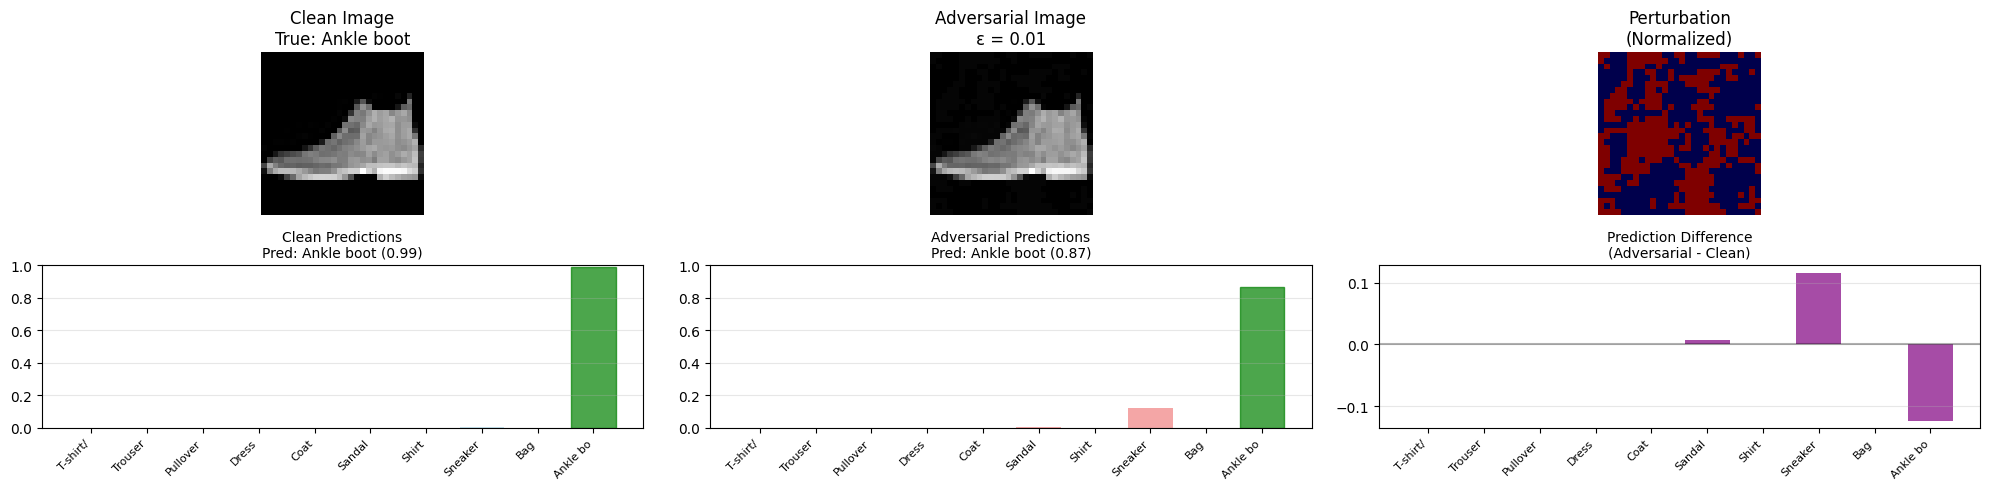


Image 0 Analysis (ε = 0.05):
True label: Ankle boot
Clean prediction: Ankle boot (confidence: 0.9921)
Adversarial prediction: Sneaker (confidence: 0.9981)
Attack successful: Yes
Perturbation magnitude (L∞): 0.050000
------------------------------------------------------------


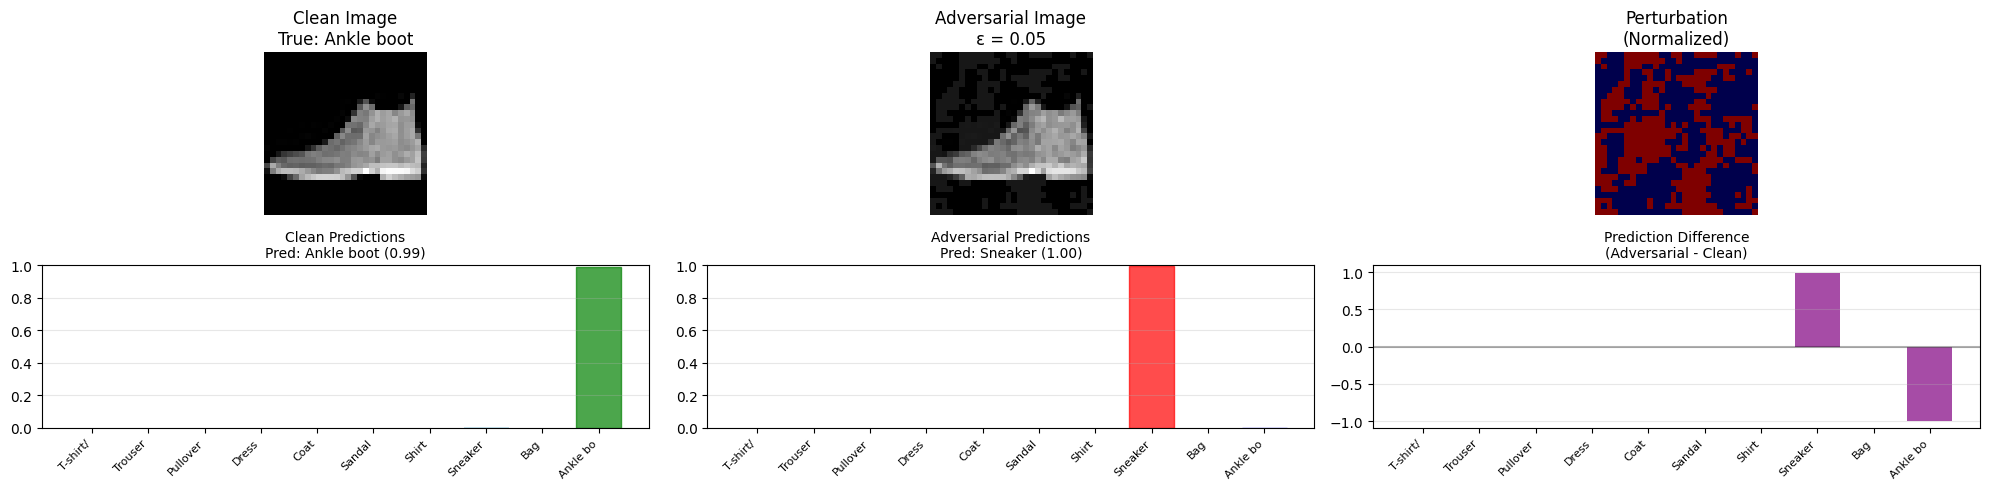


Image 0 Analysis (ε = 0.1):
True label: Ankle boot
Clean prediction: Ankle boot (confidence: 0.9921)
Adversarial prediction: Sneaker (confidence: 0.9975)
Attack successful: Yes
Perturbation magnitude (L∞): 0.100000
------------------------------------------------------------


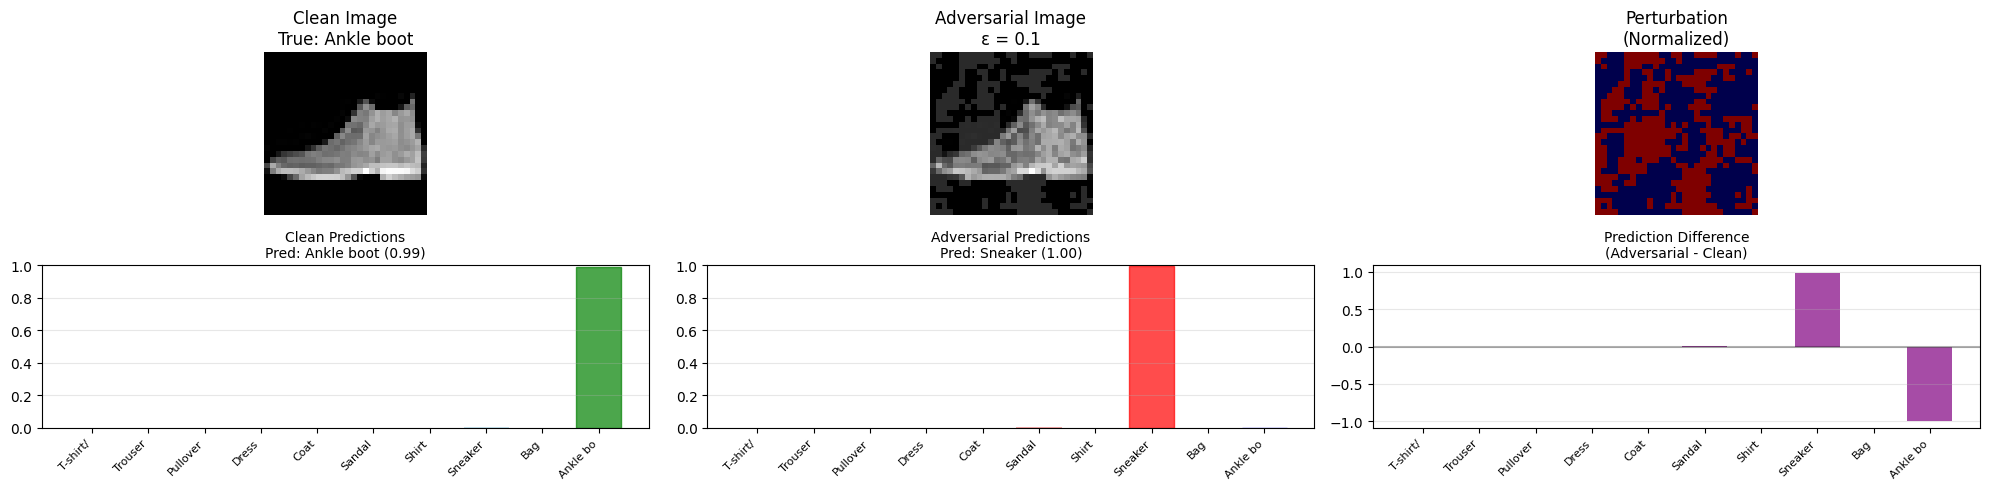


Image 0 Analysis (ε = 0.2):
True label: Ankle boot
Clean prediction: Ankle boot (confidence: 0.9921)
Adversarial prediction: Sneaker (confidence: 0.9959)
Attack successful: Yes
Perturbation magnitude (L∞): 0.200000
------------------------------------------------------------


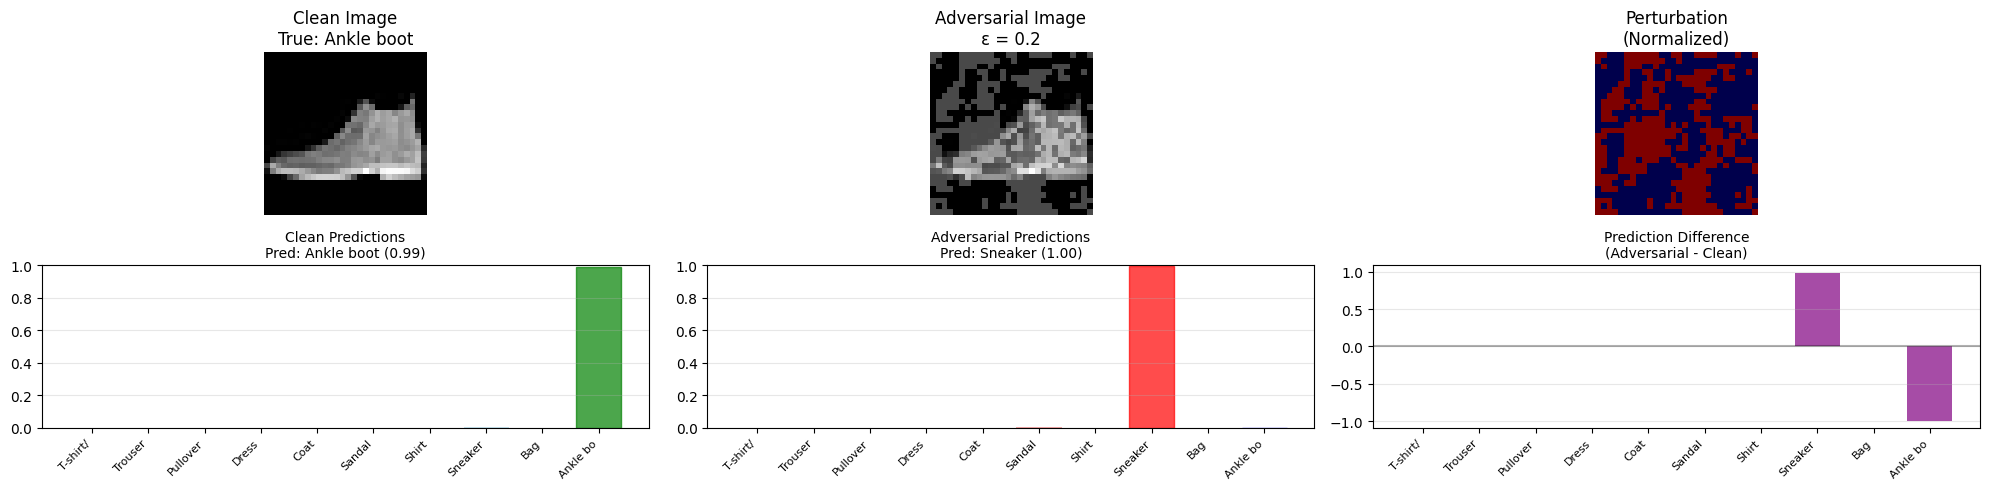

In [13]:
# Example usage: Visualize a few different images with different epsilon values
plt.style.use('default')  # Reset any previous style

# Visualize first image with different epsilon values
print("=== Comparing different epsilon values on the same image ===")
for eps_idx in range(len(epsions)):
    visualize_adversarial_attack(
        image_idx=0,
        epsilon_idx=eps_idx,
        clean_images=test_images,
        adversarial_images_list=test_adv_images_list,
        labels=test_labels,
        model=model,
        class_names=class_names,
        epsions=epsions,
        figsize=(20, 5)
    )
    plt.show()
    print()

=== Quick comparison across all epsilon values ===


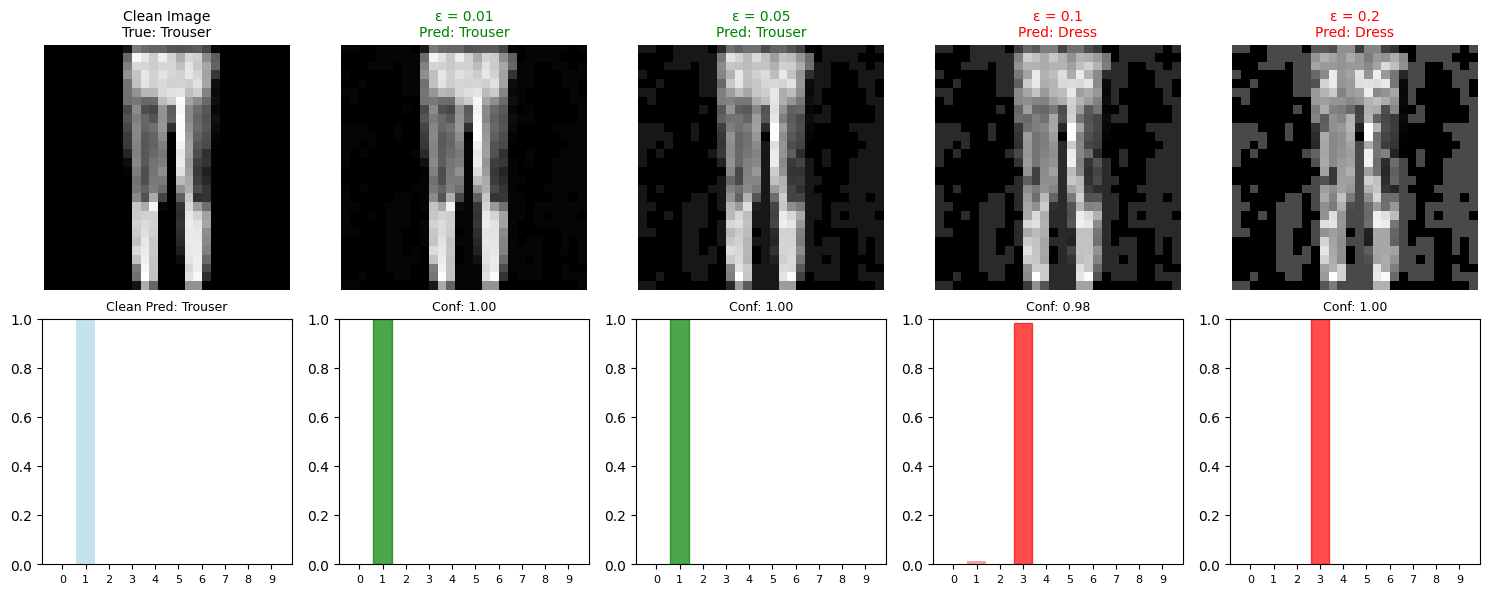

In [15]:
def quick_adversarial_comparison(image_idx, clean_images, adversarial_images_list, 
                                labels, model, class_names, epsions, figsize=(15, 10)):
    """
    Quick comparison of clean vs adversarial images across all epsilon values.
    """
    clean_img = clean_images[image_idx]
    true_label = labels[image_idx]
    
    # Make prediction for clean image
    clean_pred = model.predict(np.expand_dims(clean_img, 0), verbose=0)
    clean_probs = tf.nn.softmax(clean_pred).numpy()
    clean_pred_class = np.argmax(clean_probs[0])
    
    n_eps = len(epsions)
    fig, axes = plt.subplots(2, n_eps + 1, figsize=figsize)
    
    # First column: clean image
    axes[0, 0].imshow(clean_img, cmap='gray')
    axes[0, 0].set_title(f'Clean Image\nTrue: {class_names[true_label]}', fontsize=10)
    axes[0, 0].axis('off')
    
    axes[1, 0].bar(range(10), clean_probs[0], color='lightblue', alpha=0.7)
    axes[1, 0].set_title(f'Clean Pred: {class_names[clean_pred_class][:8]}', fontsize=9)
    axes[1, 0].set_xticks(range(10))
    axes[1, 0].set_xticklabels(range(10), fontsize=8)
    axes[1, 0].set_ylim([0, 1])
    
    # Adversarial images for each epsilon
    for i, eps in enumerate(epsions):
        adv_img = adversarial_images_list[i][image_idx]
        
        # Make prediction
        adv_pred = model.predict(np.expand_dims(adv_img, 0), verbose=0)
        adv_probs = tf.nn.softmax(adv_pred).numpy()
        adv_pred_class = np.argmax(adv_probs[0])
        
        # Plot adversarial image
        axes[0, i+1].imshow(adv_img, cmap='gray')
        color = 'red' if adv_pred_class != true_label else 'green'
        axes[0, i+1].set_title(f'ε = {eps}\nPred: {class_names[adv_pred_class][:8]}', 
                              fontsize=10, color=color)
        axes[0, i+1].axis('off')
        
        # Plot predictions
        bars = axes[1, i+1].bar(range(10), adv_probs[0], color='lightcoral', alpha=0.7)
        bars[adv_pred_class].set_color(color)
        axes[1, i+1].set_title(f'Conf: {adv_probs[0][adv_pred_class]:.2f}', fontsize=9)
        axes[1, i+1].set_xticks(range(10))
        axes[1, i+1].set_xticklabels(range(10), fontsize=8)
        axes[1, i+1].set_ylim([0, 1])
    
    plt.tight_layout()
    return fig

# Example: Quick comparison for a single image
print("=== Quick comparison across all epsilon values ===")
quick_adversarial_comparison(
    image_idx=3,
    clean_images=test_images,
    adversarial_images_list=test_adv_images_list,
    labels=test_labels,
    model=model,
    class_names=class_names,
    epsions=epsions,
    figsize=(15, 6)
)
plt.show()